<a href="https://colab.research.google.com/github/Rahul30-S/MY_Projects/blob/main/Netflix_Recommendation_system_by_Aadhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Recommendation Engine**

**What are Recommender Systems?**

Recommender systems are algorithms designed to suggest relevant items to users. These systems are used in various domains such as e-commerce, streaming services, and social media. They enhance user experience by filtering vast amounts of information to deliver personalized content.

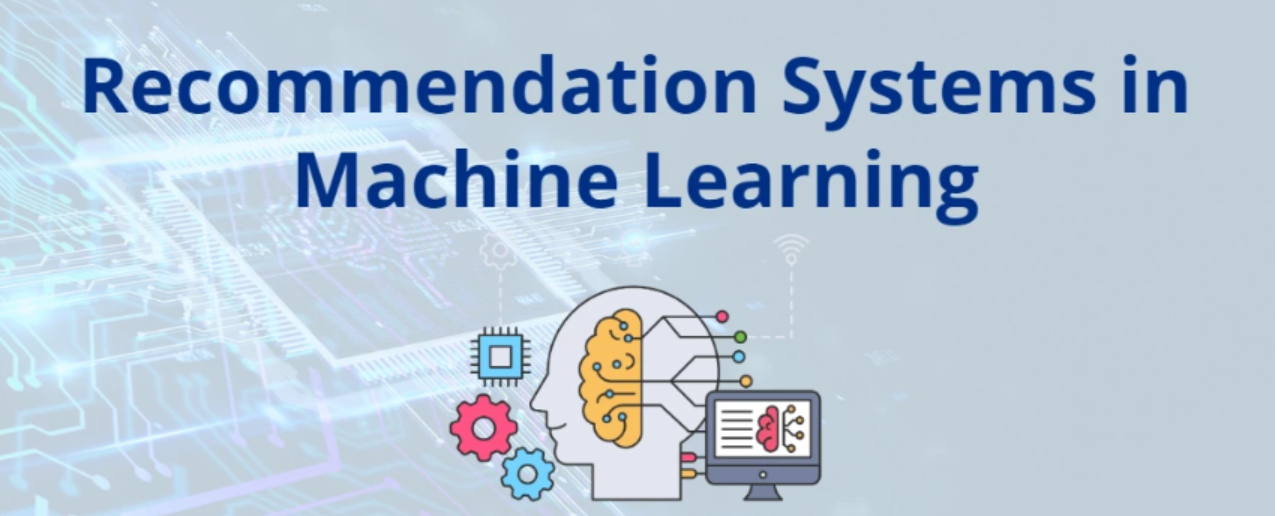

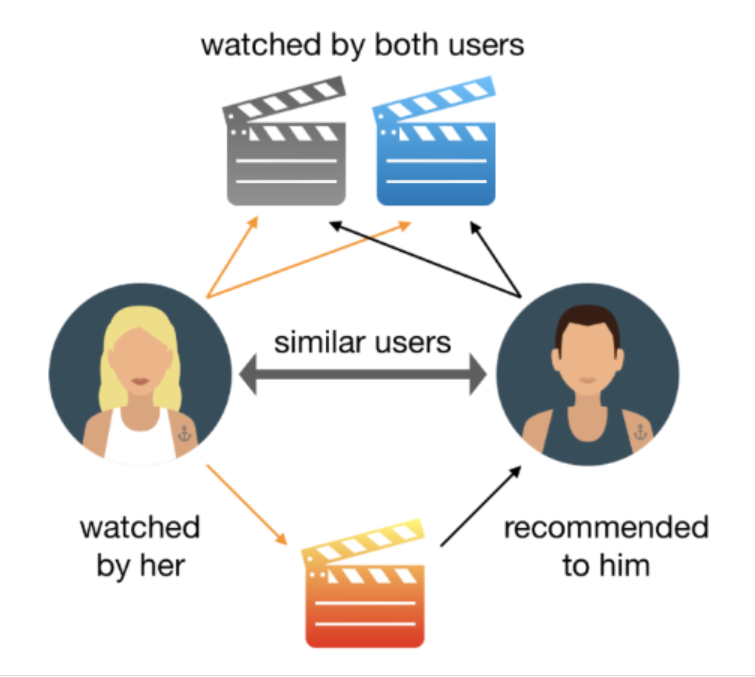

**SVD (Singular Value Decomposition) in a recommendation system works by finding patterns in user preferences and item similarities. Here's a basic idea without going deep into the topic**

**1) What the System Has: A big table (matrix) with users on one side and items (like movies) on the other. Users give ratings to items, but not everyone has rated everything**

**2) What SVD Does: SVD looks at the ratings that are available and tries to figure out the hidden connections between users and items. It learns what kind of movies users like based on their previous ratings**

**3) How It Helps: Once SVD understands these patterns, it can predict how a user might rate a movie they haven’t seen yet. Based on these predictions, the system recommends movies that the user is most likely to enjoy**

**4) Step-by-Step Implementation of SVD in a Recommendation System**

Install and Import Libraries

Load and Prepare the Dataset

Train the SVD Model

Evaluate the Model

Make Predictions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
netflix_dataset=pd.read_csv("/content/drive/MyDrive/NETFLIX/Copy of combined_data_1.txt (1).zip",header=None , names=["Cust_Id" , "Rating"] , usecols=[0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


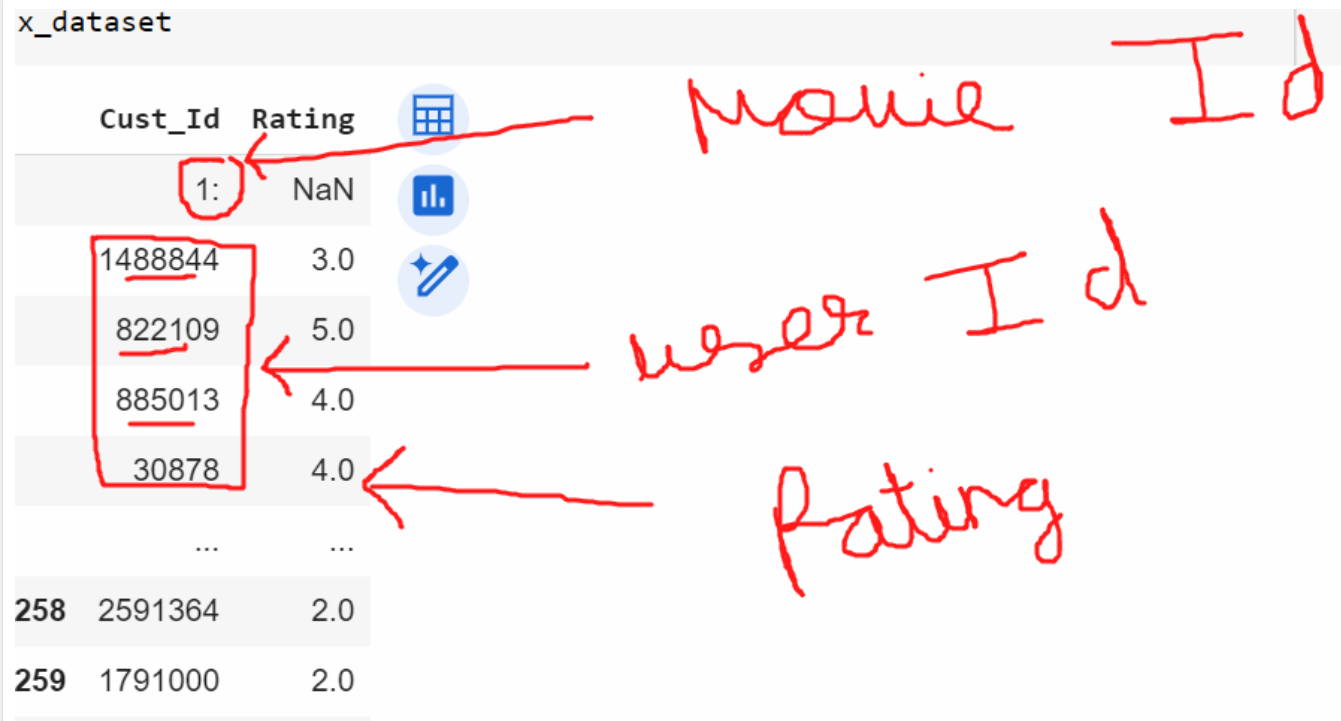

In [ ]:
netflix_dataset.isnull().sum()

,0
Cust_Id,0
Rating,4499


In [ ]:
movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count["Rating"]
movie_count

4499

In [ ]:
total_count = netflix_dataset["Cust_Id"].nunique()

In [ ]:
total_count

475257

In [ ]:
customer_count = total_count - movie_count

In [ ]:
customer_count

470758

In [ ]:
#ratings
ratings_count = netflix_dataset["Cust_Id"].count()-movie_count

In [ ]:
ratings_count

24053764

In [ ]:
#1, 2,3,4,5
stars = netflix_dataset.groupby("Rating")['Rating'].agg(["count"])

In [ ]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


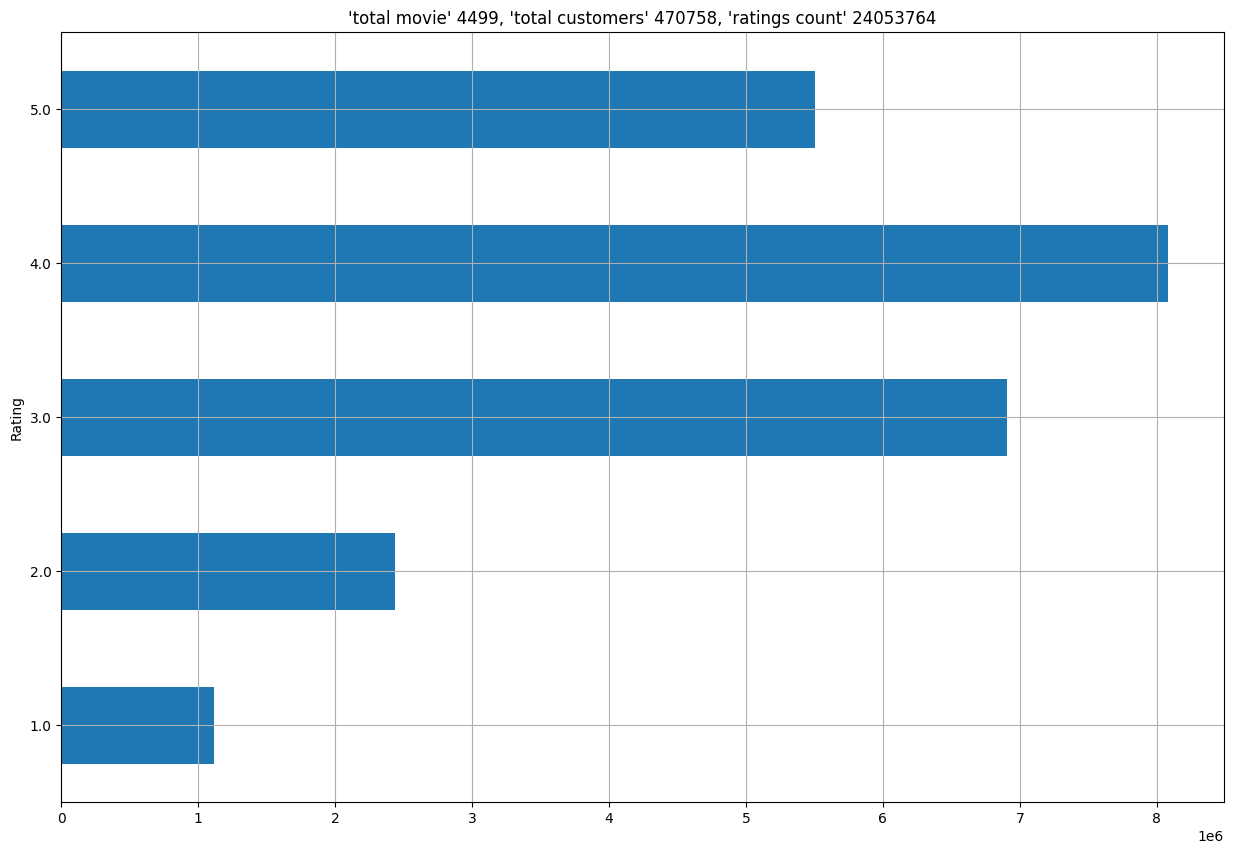

In [ ]:
ax = stars.plot(kind = "barh",legend = False,figsize=(15,10))
plt.title(f"'total movie' {movie_count}, 'total customers' {customer_count}, 'ratings count' {ratings_count}" )
plt.grid(True)
plt.show()

In [ ]:
movie_id = None
movie_np = []

for i in netflix_dataset["Cust_Id"]:
  if ":" in i :
    movie_id = int(i.replace(":",""))
  movie_np.append(movie_id)

In [ ]:
movie_np.count

<function list.count(value, /)>

In [ ]:
len(movie_np)

24058263

In [ ]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
netflix_dataset["Movie_Id"] = movie_np

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset = netflix_dataset[netflix_dataset["Rating"].notna()]

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)

<ipython-input-28-f6b8dcbe5e62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)


In [ ]:
dataset_movie_summary = netflix_dataset.groupby("Movie_Id")["Rating"].agg(["count"])
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
#pre - filtering
#now we will create a filterof benchmark for movies
movie_benchmark = round(dataset_movie_summary["count"].quantile(0.6),0)

In [ ]:
movie_benchmark

908.0

In [ ]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary["count"] < movie_benchmark].index

In [ ]:
len(drop_movie_list)

2699

In [ ]:
dataset_cust_summary = netflix_dataset.groupby("Cust_Id")["Rating"].agg(["count"])

In [ ]:
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark = round(dataset_cust_summary["count"].quantile(0.6),0)
cust_benchmark

36.0

In [ ]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary["count"] < cust_benchmark].index

In [ ]:
len(drop_cust_list)

282042

In [ ]:
netflix_dataset = netflix_dataset[~netflix_dataset["Movie_Id"].isin(drop_movie_list)]
netflix_dataset = netflix_dataset[~netflix_dataset["Cust_Id"].isin(drop_cust_list)]

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


#MODEL BUILDING

In [ ]:
df_title = pd.read_csv("/content/drive/MyDrive/NETFLIX/Copy of movie_titles.csv", encoding= "ISO-8859-1",header = None, names = ["Movie_id","year","name"],usecols = [0,1,2])

In [ ]:
df_title

,Movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505173 sha256=bbf2b1629f19c2e02d2e50a7fba36577205fb0e11c2a710e11d5bb3295994bbd
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()

In [ ]:
data = Dataset.load_from_df(netflix_dataset[["Cust_Id","Movie_Id","Rating"]][:1000000],reader)

In [ ]:
data

In [ ]:
model = SVD()

In [ ]:
cross_validate(model,data,measures=["RMSE"],cv = 3)

{'test_rmse': array([0.96769545, 0.9678836 , 0.96866303]),
 'fit_time': (16.33766484260559, 16.684627532958984, 18.518943786621094),
 'test_time': (4.4720845222473145, 3.291565179824829, 3.768348455429077)}

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


#RECOMMENDATIONS

In [ ]:
user_rating = netflix_dataset[netflix_dataset["Cust_Id"] == 1331154]

In [ ]:
user_rating

,Cust_Id,Rating,Movie_Id
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [ ]:
user_1331154 = df_title.copy()

now we are tremoving the movies which got less ratings basically which are there in the drop movie list

In [ ]:
user_1331154 = user_1331154[~user_1331154["Movie_id"].isin(drop_movie_list)]

In [ ]:
user_1331154

,Movie_id,year,name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
#predication
user_1331154["Estimated_Score"] = user_1331154["Movie_id"].apply(lambda x:model.predict(1331154, x).est)

<ipython-input-65-91109b063b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154["Estimated_Score"] = user_1331154["Movie_id"].apply(lambda x:model.predict(1331154, x).est)


In [ ]:
user_1331154

,Movie_id,year,name,Estimated_Score
2,3,1997.0,Character,3.886886
4,5,2004.0,The Rise and Fall of ECW,4.154499
5,6,1997.0,Sick,3.397930
7,8,2004.0,What the #$*! Do We Know!?,3.778266
15,16,1996.0,Screamers,3.363630
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.746308
17766,17767,2004.0,Fidel Castro: American Experience,3.746308
17767,17768,2000.0,Epoch,3.746308
17768,17769,2003.0,The Company,3.746308


In [ ]:
user_1331154.sort_values("Estimated_Score",ascending = False)

,Movie_id,year,name,Estimated_Score
269,270,2001.0,Sex and the City: Season 4,4.829512
67,68,2004.0,Invader Zim,4.643393
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.606520
112,113,2000.0,Bruce Lee: A Warrior's Journey,4.590116
75,76,1952.0,I Love Lucy: Season 2,4.503860
...,...,...,...,...
16,17,2005.0,7 Seconds,2.879373
77,78,1996.0,Jingle All the Way,2.723310
180,181,2004.0,The Last Shot,2.646736
126,127,1987.0,Fatal Beauty,2.546720
